In [34]:
import pandas as pd
import numpy as np

## Outlier Detection and Treatment

In [35]:
boston_df = pd.read_csv('Boston.csv')

In [36]:
boston_df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

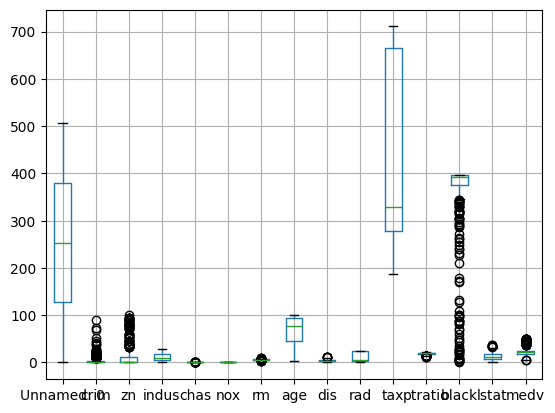

In [37]:
boston_df.boxplot()

<Axes: xlabel='dis'>

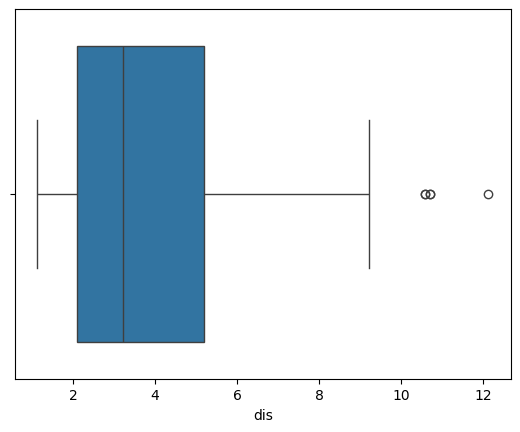

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=boston_df['dis'])

In [39]:
def calculate_allowed_range(df, col_name):
    col_np_array = df[f'{col_name}'].values
    q1, q3 = np.percentile(col_np_array, [25, 75])
    iqr = q3 - q1
    upper_allowed_range = q3 + (1.5 * iqr)
    lower_allowed_range = q1 - (1.5 * iqr)
    return lower_allowed_range, upper_allowed_range

In [40]:
lower_allowed_range, upper_allowed_range = calculate_allowed_range(boston_df, 'dis')
lower_allowed_range, upper_allowed_range

(-2.5322000000000005, 9.820800000000002)

In [41]:
filter_cond = (boston_df['dis'] > lower_allowed_range) &  (boston_df['dis'] < upper_allowed_range)
len(boston_df['dis'].values)

506

In [42]:
boston_df = boston_df[filter_cond]

In [43]:
len(boston_df.dis.values)

501

<Axes: xlabel='dis'>

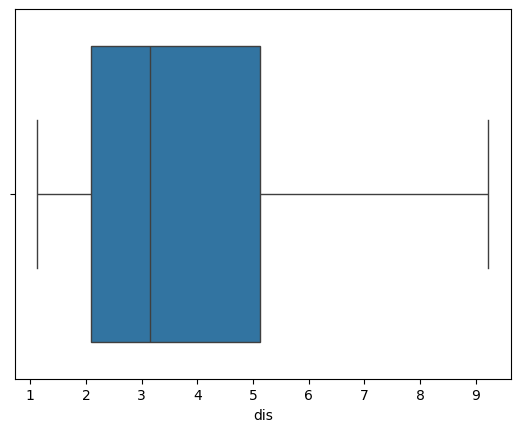

In [44]:
sns.boxplot(x=boston_df['dis'])

## Correlation

In [45]:

boston_df.drop('Unnamed: 0', axis=1, inplace=True)
pearsoncorr = boston_df.corr(method = 'pearson')
pearsoncorr


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.197045,0.405070,-0.057085,0.419441,-0.220593,0.350953,-0.389244,0.624689,0.582689,0.293911,-0.384430,0.454222,-0.389168
zn,-0.197045,1.000000,-0.522068,-0.036798,-0.506471,0.329664,-0.556961,0.632905,-0.307898,-0.313254,-0.424341,0.174996,-0.405733,0.374678
indus,0.405070,-0.522068,1.000000,0.059823,0.759689,-0.398559,0.637736,-0.710742,0.593388,0.723164,0.395794,-0.356755,0.599738,-0.489142
chas,-0.057085,-0.036798,0.059823,1.000000,0.088550,0.090968,0.083442,-0.095687,-0.009062,-0.036855,-0.120921,0.049561,-0.056617,0.175463
nox,0.419441,-0.506471,0.759689,0.088550,1.000000,-0.307300,0.726982,-0.779518,0.609673,0.669190,0.197554,-0.379776,0.586774,-0.431362
rm,-0.220593,0.329664,-0.398559,0.090968,-0.307300,1.000000,-0.247881,0.223962,-0.211945,-0.292789,-0.352913,0.129013,-0.618199,0.694797
age,0.350953,-0.556961,0.637736,0.083442,0.726982,-0.247881,1.000000,-0.750649,0.452882,0.507512,0.275461,-0.272692,0.598830,-0.383383
dis,-0.389244,0.632905,-0.710742,-0.095687,-0.779518,0.223962,-0.750649,1.000000,-0.504962,-0.552740,-0.264611,0.300387,-0.498097,0.265689
rad,0.624689,-0.307898,0.593388,-0.009062,0.609673,-0.211945,0.452882,-0.504962,1.000000,0.911417,0.471650,-0.443783,0.486202,-0.383126
tax,0.582689,-0.313254,0.723164,-0.036855,0.669190,-0.292789,0.507512,-0.552740,0.911417,1.000000,0.465659,-0.441691,0.543021,-0.468504


<Axes: >

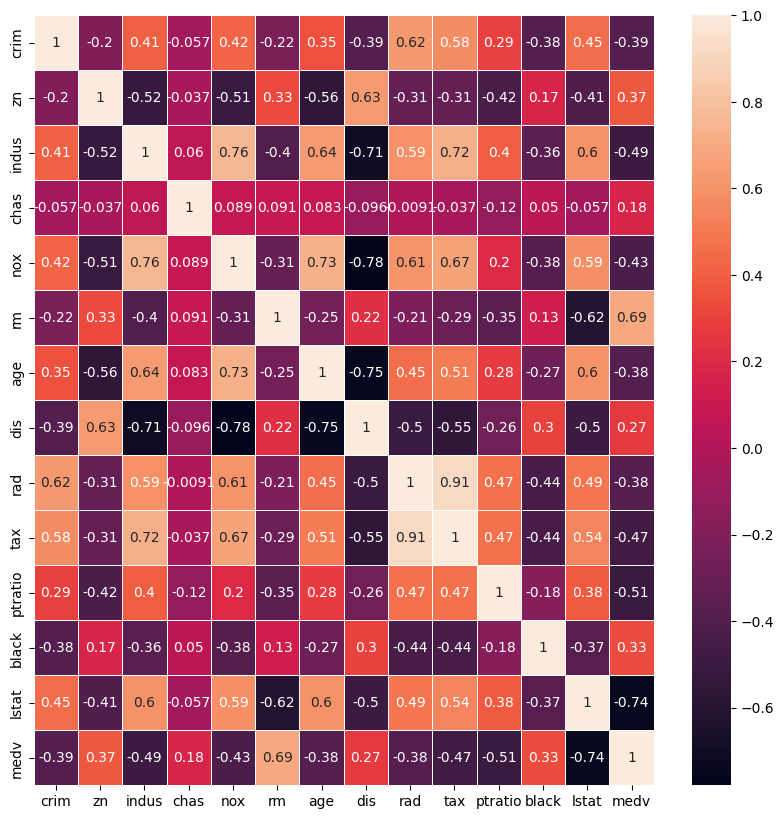

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,10), dpi=100)
#sns.heatmap(boston_df.corr(), annot=True)
sns.heatmap(pearsoncorr,
xticklabels=pearsoncorr.columns,
yticklabels=pearsoncorr.columns,
annot=True,
linewidth=0.5)

In [47]:

#medv is ouput column, need to create a regressison model for thie, for that we need to only pick columns that are correlated to the the output colm
pearsoncorr['medv'][abs(pearsoncorr['medv']) > 0.5]

rm         0.694797
ptratio   -0.508040
lstat     -0.740998
medv       1.000000
Name: medv, dtype: float64

In [48]:
pearsoncorr['rm'][abs(pearsoncorr['rm']) > 0.5]

rm       1.000000
lstat   -0.618199
medv     0.694797
Name: rm, dtype: float64

In [49]:
pearsoncorr['ptratio'][abs(pearsoncorr['ptratio']) > 0.5]

ptratio    1.00000
medv      -0.50804
Name: ptratio, dtype: float64

In [50]:
pearsoncorr['lstat'][abs(pearsoncorr['lstat']) > 0.5]

indus    0.599738
nox      0.586774
rm      -0.618199
age      0.598830
tax      0.543021
lstat    1.000000
medv    -0.740998
Name: lstat, dtype: float64

In [51]:
##above checks prove that there are only two columns that in corelation with output mdev, either "rm" ot "lstat" can dropped because they are correlated.

##we choose 'lstat' and 'ptratio' for our output model, dropping "rm"

boston_df.drop(columns = ["rm"], inplace = True)
boston_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

## Multivariate Outliers

In [ ]:
boston_df